## Tarea
Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos
disponibles. Se valorará:

- Generación de nuevas características a partir de las existentes
- Codificación de variables
- Análisis exploratorio
- Selección y evaluación del modelo
- Comparativa de distintos algoritmos

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1)

In [248]:
import seaborn as sns

def plot_corr_matrix(df, col):
    # Compute the correlation matrix
    corr = np.abs(df.drop([col], axis=1).corr())

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
                linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

    plt.show()

In [249]:
airbnb_df = pd.read_csv('airbnb-listings-extract.csv', sep=';')

In [250]:
airbnb_df.shape

(14780, 89)

In [251]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [7]:
airbnb_df.dtypes

ID                                int64  
Listing Url                       object 
Scrape ID                         int64  
Last Scraped                      object 
Name                              object 
Summary                           object 
Space                             object 
Description                       object 
Experiences Offered               object 
Neighborhood Overview             object 
Notes                             object 
Transit                           object 
Access                            object 
Interaction                       object 
House Rules                       object 
Thumbnail Url                     object 
Medium Url                        object 
Picture Url                       object 
XL Picture Url                    object 
Host ID                           int64  
Host URL                          object 
Host Name                         object 
Host Since                        object 
Host Location                     

In [258]:
loc_attr = airbnb_df.loc[:,['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country']]
loc_attr.head()

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country
0,NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States
1,NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain",ES,Spain
2,NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08008,Barcelona,"Barcelona, Spain",ES,Spain
3,NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08009,Barcelona,"Barcelona, Spain",ES,Spain
4,L'Antiga Esquerra de l'Eixample,l'Antiga Esquerra de l'Eixample,Eixample,Barcelona,Catalunya,08036,Barcelona,"Barcelona, Spain",ES,Spain


In [259]:
loc_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Neighbourhood                 9551 non-null   object
 1   Neighbourhood Cleansed        14780 non-null  object
 2   Neighbourhood Group Cleansed  13760 non-null  object
 3   City                          14774 non-null  object
 4   State                         14636 non-null  object
 5   Zipcode                       14274 non-null  object
 6   Market                        14723 non-null  object
 7   Smart Location                14780 non-null  object
 8   Country Code                  14780 non-null  object
 9   Country                       14779 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


De todas los `features` relacionados con la localizacion he decidido quedarme con el Neighbourhood Cleansed ya que veo que son demasiados para referirse a lo mismo y he cogido ese en particular porque es el mas completo con la uicacion exacta del apartamento

Haciendo esta opcion vemos que hay muchos elementos de tipo `object` y que dado el problema a resolver tiene que ver con el calculo del precio hay `features` que a priori no sirven:

ID, Listing Url, Scrape ID, Last Scraped, Name, Summary, Space, Description, Neighborhood Overview, Notes, Transit, Access, Interaction, House Rules, Thumbnail Url, Medium Url, Picture Url, XL Picture Url, Host ID, Host URL, Host Name, Host Since, Host Location, Host About, Host Response Time, Host Response Rate, Host Acceptance Rate, Host Thumbnail Url, Host Picture Url, Host Neighbourhood, Host Listings Count, Host Total Listings Count, Host Verifications, Street, Neighbourhood, Neighbourhood Group Cleansed, City, State, Zipcode, Market, Smart Location, Country Code, Country, Calendar Updated, Has Availability, Calendar last Scraped, First Review, Last Review, License, Jurisdiction Names, Calculated host listings count, Geolocation

Procedemo a eliminarlas y a crear los conjuntos de train y test.

In [8]:
airbnb_df.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Calculated host listings count', 'Geolocation'] , axis=1, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

train, test  = train_test_split(airbnb_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')


# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 37)
Dimensiones del dataset de test: (2956, 37)


In [98]:
data = pd.read_csv('./train.csv', sep=';', decimal='.')

Vamos ahora a analizar los datos de train con los que vamos a entrenar nuestro modelo un poco mas a fondo

In [99]:
data.shape

(11824, 37)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Experiences Offered          11824 non-null  object 
 1   Neighbourhood Cleansed       11824 non-null  object 
 2   Latitude                     11824 non-null  float64
 3   Longitude                    11824 non-null  float64
 4   Property Type                11824 non-null  object 
 5   Room Type                    11824 non-null  object 
 6   Accommodates                 11824 non-null  int64  
 7   Bathrooms                    11780 non-null  float64
 8   Bedrooms                     11804 non-null  float64
 9   Beds                         11787 non-null  float64
 10  Bed Type                     11824 non-null  object 
 11  Amenities                    11683 non-null  object 
 12  Square Feet                  474 non-null    float64
 13  Price           

Vemos que hay varias columnas de tipo object, inspeccionemoslas un poco más a fondo.

In [101]:
data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Experiences Offered     11824 non-null  object
 1   Neighbourhood Cleansed  11824 non-null  object
 2   Property Type           11824 non-null  object
 3   Room Type               11824 non-null  object
 4   Bed Type                11824 non-null  object
 5   Amenities               11683 non-null  object
 6   Cancellation Policy     11824 non-null  object
 7   Features                11823 non-null  object
dtypes: object(8)
memory usage: 739.1+ KB


Observamos que todas las , a priori, \'importantes\' estan rellenas, he dejado dos que me quiero ver como influyen que son `Amenities` y `Features`, por lo que prodecemos a codificar las variables

In [102]:
def mean_encoder(df, column, target):
    mean_encode = df.groupby(column)[target].mean()
    return mean_encode

In [103]:
def apply_codifications(df, encoder_dict):
    for (k,v) in encoder_dict.items():
        df.loc[:, f"{k}_label"] = df[k].map(v)
        df.drop(k, axis=1, inplace=True)

In [104]:
encoder_dict = {
    'Neighbourhood Cleansed': mean_encoder(data, 'Neighbourhood Cleansed', 'Price'),
    'Property Type': mean_encoder(data, 'Property Type', 'Price'),
    'Room Type': mean_encoder(data, 'Room Type', 'Price'),
    'Bed Type': mean_encoder(data, 'Bed Type', 'Price'),
    'Cancellation Policy': mean_encoder(data, 'Cancellation Policy', 'Price'),
    'Experiences Offered': mean_encoder(data, 'Experiences Offered', 'Price')
}

In [105]:
apply_codifications(data, encoder_dict)

Ahora vamos a codigicar las dos variables que son cadenas de texto para ello me he creado un codificados customizado que suma el 'peso' de cada amenitie y lo divive entre el total de amenities por el precio

In [106]:
def create_dict(d, w):
    try:
        d[w] += 1
    except:
        d[w] = 1

In [107]:
def create_field_dict(df, field):
    target = df.loc[:,field]
    # hay algunos valores nan por lo que lo sustitumos por cadena vacia
    target.replace(np.nan, '', regex=True, inplace=True)
    target_dict = {}
    x = [create_dict(target_dict, w) for it in target for w in it.split(',') ]
    return target_dict

In [108]:
def apply_dict_codification(df, field_dict, field):
    target = df.loc[:,field]
    target.replace(np.nan, '', regex=True, inplace=True)
    price = data.loc[:, 'Price'].mean()
    arr_lbl = []
    for it in target:
        if len(it) == 0:
            arr_lbl.append(0)
        else:
            arr_lbl.append(sum([field_dict.get(i,0) for i in it.split(',')]) / (len(it) * price))
    df[f"{field}_label"] = arr_lbl
    df.drop(field, axis=1, inplace=True)

In [109]:
amenities_dict = create_field_dict(data, 'Amenities')
feature_dict = create_field_dict(data, 'Features')
apply_dict_codification(data, amenities_dict, 'Amenities')
apply_dict_codification(data, feature_dict, 'Features')

Ahora que tenemos las variables object codificadas vamos a ver que valores hace falta imputar

In [110]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11780.0,1.285229,0.664691,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.344290,0.905180,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11787.0,2.049122,1.623489,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,474.0,396.489451,671.125823,0.000000,0.000000,90.000000,624.000000,6997.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000
Weekly Price,2881.0,378.437348,194.751472,70.000000,220.000000,350.000000,500.000000,999.000000
Monthly Price,2869.0,1432.390728,1236.992934,250.000000,720.000000,1200.000000,1750.000000,25000.000000


Observamos que hay algunas columnas que no tienen todos los datos

In [111]:
data.loc[:,data.isnull().any()].describe().T

,count,mean,std,min,25%,50%,75%,max
Bathrooms,11780.0,1.285229,0.664691,0.00,1.00,1.00,1.00,8.00
Bedrooms,11804.0,1.344290,0.905180,0.00,1.00,1.00,2.00,10.00
Beds,11787.0,2.049122,1.623489,1.00,1.00,2.00,2.00,16.00
Square Feet,474.0,396.489451,671.125823,0.00,0.00,90.00,624.00,6997.00
Price,11809.0,73.712592,71.624844,9.00,34.00,55.00,87.00,969.00
Weekly Price,2881.0,378.437348,194.751472,70.00,220.00,350.00,500.00,999.00
Monthly Price,2869.0,1432.390728,1236.992934,250.00,720.00,1200.00,1750.00,25000.00
Security Deposit,5052.0,189.312154,116.011858,0.00,100.00,150.00,200.00,990.00
Cleaning Fee,6974.0,32.073129,31.278032,0.00,15.00,25.00,40.00,662.00
Review Scores Rating,9163.0,91.628179,9.137614,20.00,89.00,94.00,98.00,100.00


Partiendo del conjunto de datos, a mi parecer podemos intuir para inputar:
- Las columnas `Bathrooms`, `Bedrooms`, `Security Deposit` y `Cleaning Fee` la ausencia de datos a mi parecer es un 0.
- La columna `Beds` dependeria de `Accommodates` y `Bedrooms`
- `Square Feet` tiene desasiados valores ha imputar, he optado por eliminarla, si como `Weekly Price`, `Monthly Price` que consta con mas datos pero inferiores al 30% del total de las muestras 
- `Price`y todos los campos de `Reviews`se imputarán por la media

In [112]:
# Guardar campo valor
values_to_impute = {
    'Beds': 0,
    'Bathrooms': 0,
    'Bedrooms': 0,
    'Security Deposit': 0,    
    'Cleaning Fee': 0,
    'Price': data.loc[:, 'Price'].mean() , 
    'Review Scores Rating': data.loc[:, 'Review Scores Rating'].mean(),
    'Review Scores Accuracy': data.loc[:, 'Review Scores Accuracy'].mean(),
    'Review Scores Cleanliness': data.loc[:, 'Review Scores Cleanliness'].mean(),
    'Review Scores Checkin': data.loc[:, 'Review Scores Checkin'].mean(),
    'Review Scores Communication': data.loc[:, 'Review Scores Communication'].mean(),
    'Review Scores Location': data.loc[:, 'Review Scores Location'].mean(),
    'Review Scores Value': data.loc[:, 'Review Scores Value'].mean(),
    'Reviews per Month': data.loc[:, 'Reviews per Month'].mean()  
}

drop_cols= ['Square Feet', 'Weekly Price', 'Monthly Price']

# Relenar Beds -> (data.loc[:, 'Beds'].mean() * data.loc[:, 'Accommodates'] / data.loc[:, 'Bedrooms']).apply(np.ceil).replace([np.inf, -np.inf],0)

In [113]:
def apply_tansformtions(df, colums_to_drop, values_to_impute):
    df.drop(colums_to_drop, axis=1, inplace=True)
    df.fillna(values_to_impute, inplace=True)

In [114]:
apply_tansformtions(data, drop_cols, values_to_impute)

In [115]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11824.0,1.280447,0.668053,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11824.0,1.342016,0.906100,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11824.0,2.042710,1.624982,0.000000,1.000000,2.000000,2.000000,16.000000
Price,11824.0,73.712592,71.579394,9.000000,34.000000,55.000000,87.000000,969.000000
Security Deposit,11824.0,80.886756,120.502046,0.000000,0.000000,0.000000,150.000000,990.000000
Cleaning Fee,11824.0,18.917287,28.738254,0.000000,0.000000,10.000000,30.000000,662.000000
Guests Included,11824.0,1.581614,1.160518,0.000000,1.000000,1.000000,2.000000,16.000000


In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11824.0,1.280447,0.668053,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11824.0,1.342016,0.906100,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11824.0,2.042710,1.624982,0.000000,1.000000,2.000000,2.000000,16.000000
Price,11824.0,73.712592,71.579394,9.000000,34.000000,55.000000,87.000000,969.000000
Security Deposit,11824.0,80.886756,120.502046,0.000000,0.000000,0.000000,150.000000,990.000000
Cleaning Fee,11824.0,18.917287,28.738254,0.000000,0.000000,10.000000,30.000000,662.000000
Guests Included,11824.0,1.581614,1.160518,0.000000,1.000000,1.000000,2.000000,16.000000


In [117]:
def scatter_plot_comparation(df, column_to_compare):
    plt.figure(figsize=(20,50))
    for i,feature in enumerate(df.select_dtypes(exclude='object').columns.drop([column_to_compare])):
        plt.subplot(9,4,i+1)   
        plt.scatter(x=df[column_to_compare],y=df[feature] )
        plt.xlabel(column_to_compare)
        plt.ylabel(feature)
        plt.title(feature)

    plt.show()

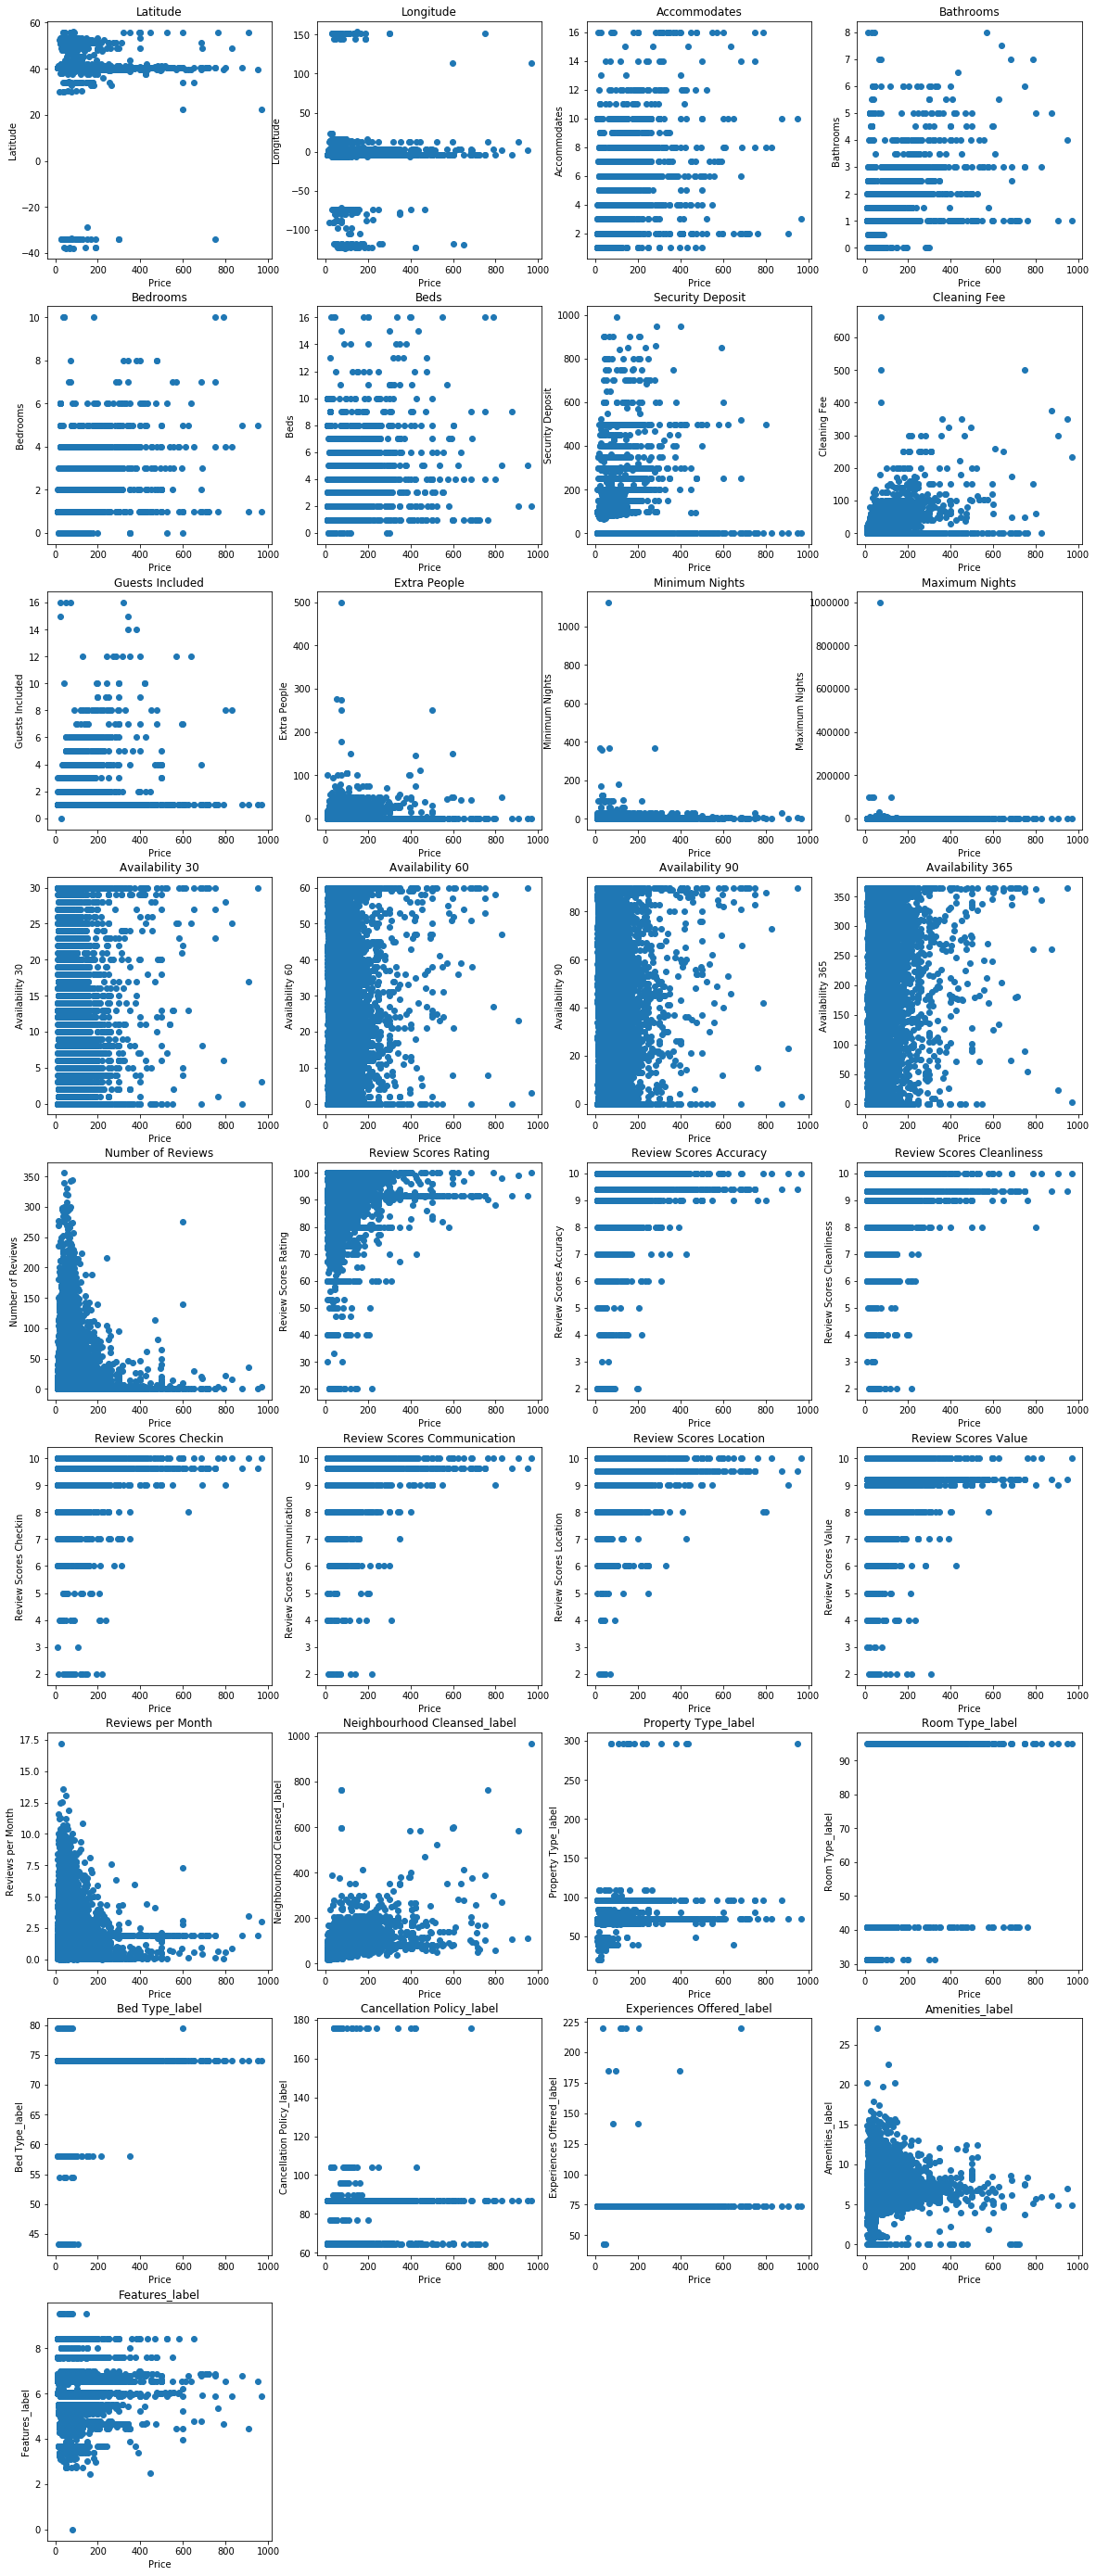

In [118]:
scatter_plot_comparation(data, 'Price')

A mi parecer viendo los `statter plots` se observa que, en general, a partir de un precio de 800€ tienden a dispersarse mas las muestras por los que las considerare como outliers

Tambien observamos que:
 - `Cleaning Fee` se podrian considerar ouliers todo lo superior a 400
 - `Minimum Nights` todo lo superior a 100
 - `Maximum Nights` todo lo superior a 10000
 - `Extra People` todo lo superior a 300
 - `Experiences Offered_label`, lo distinto a 75

In [119]:
data = data[data['Price'] < 800]
data = data[data['Cleaning Fee'] < 400]
data = data[data['Minimum Nights'] < 100]
data = data[data['Maximum Nights'] < 10000]
data = data[data['Extra People'] < 300]
data = data[(data['Experiences Offered_label'] > 70) & (data['Experiences Offered_label'] < 80 )]

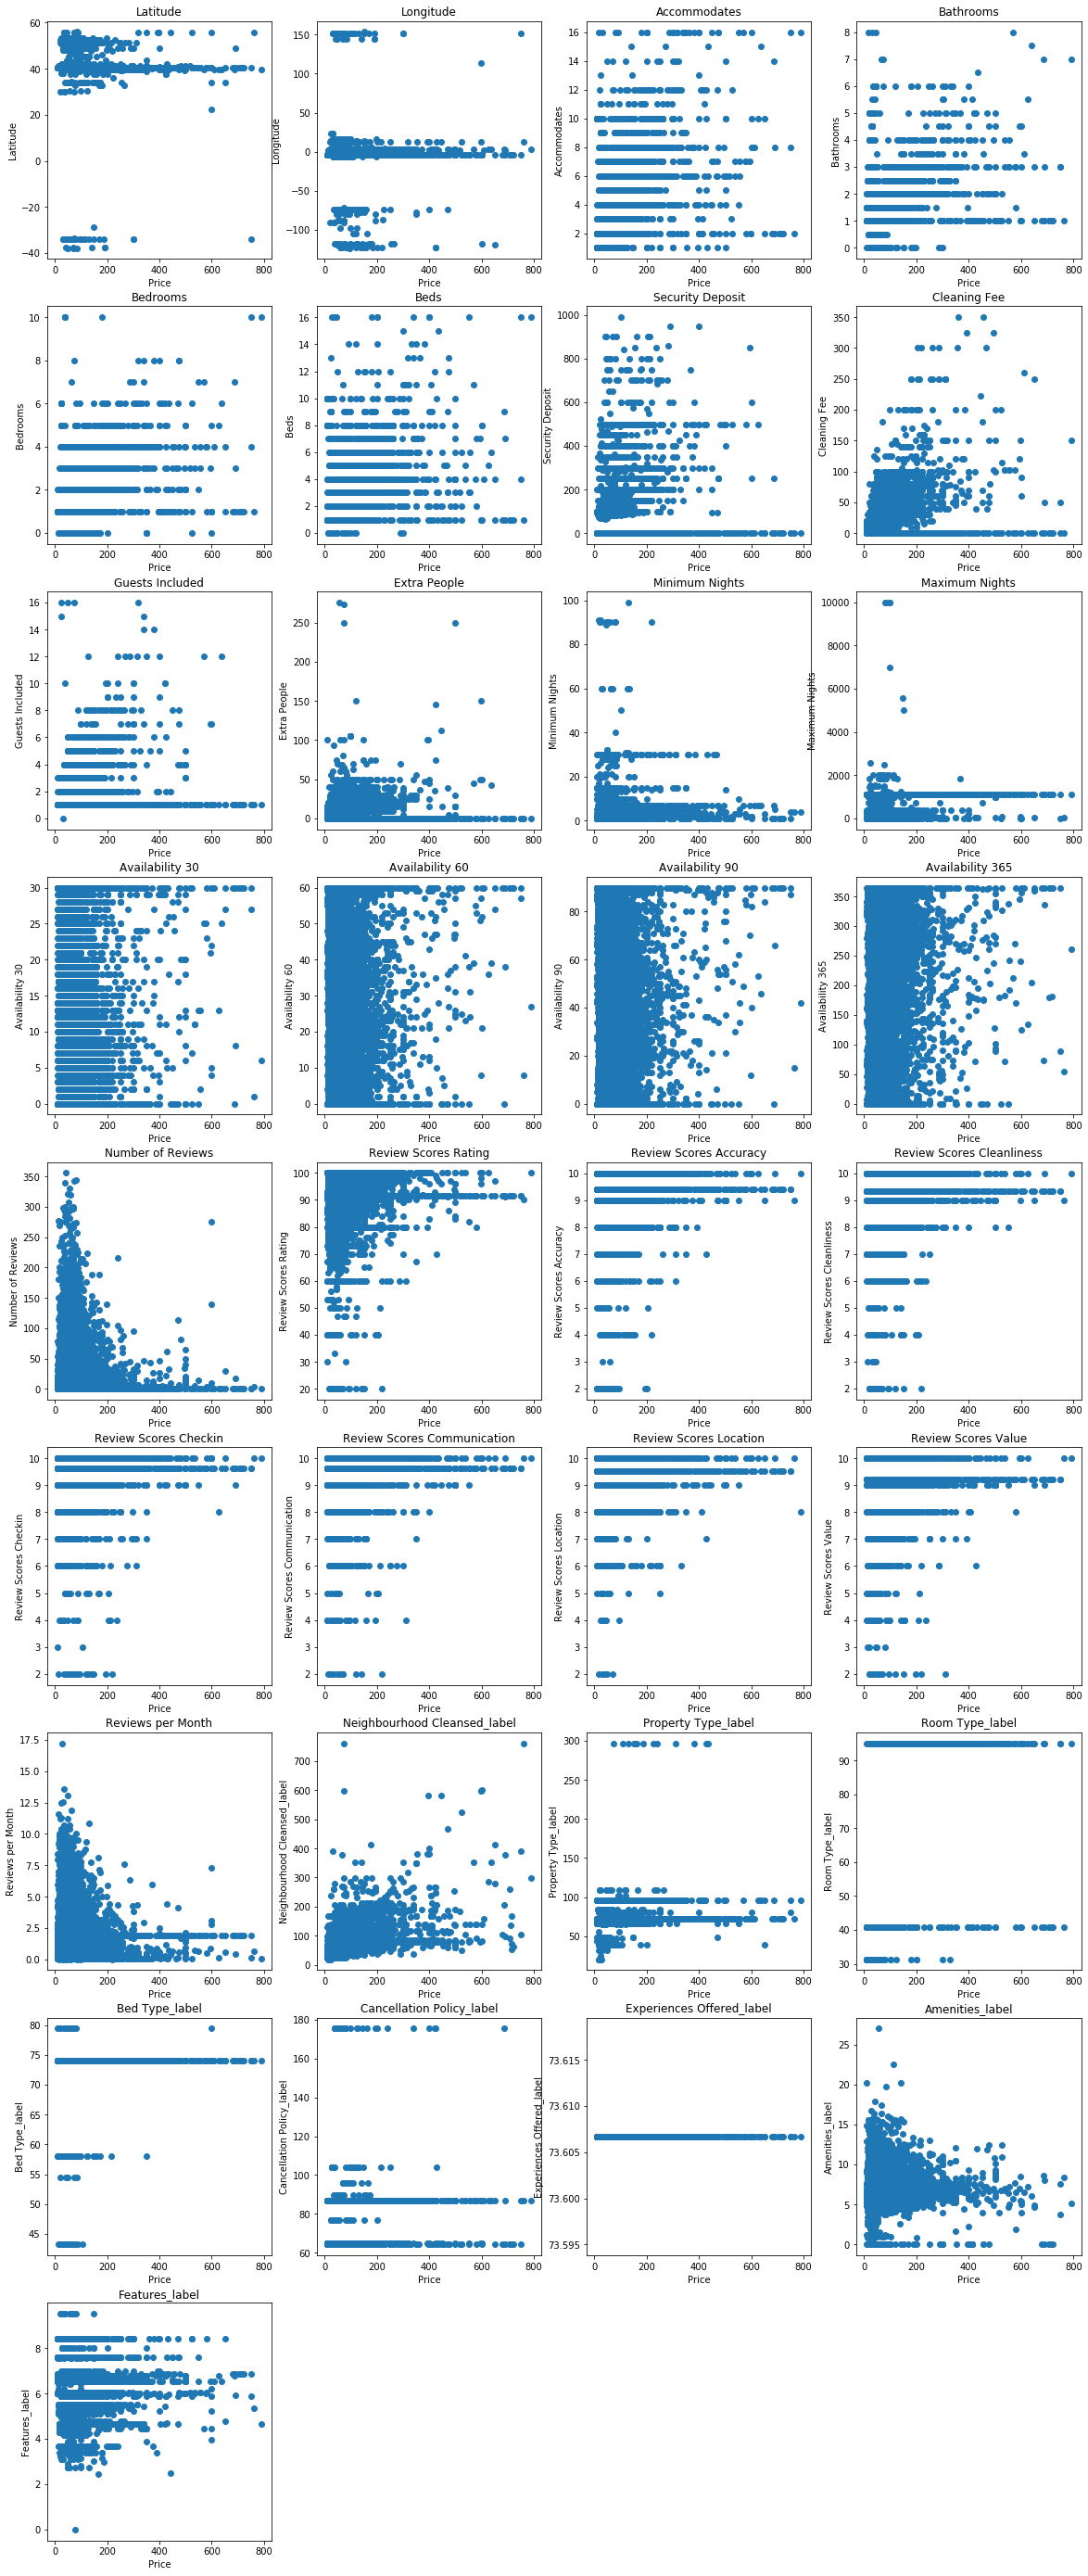

In [120]:
scatter_plot_comparation(data,'Price' )

Ahora que hemos visto los `scatter plot` vamos a ver la correlación

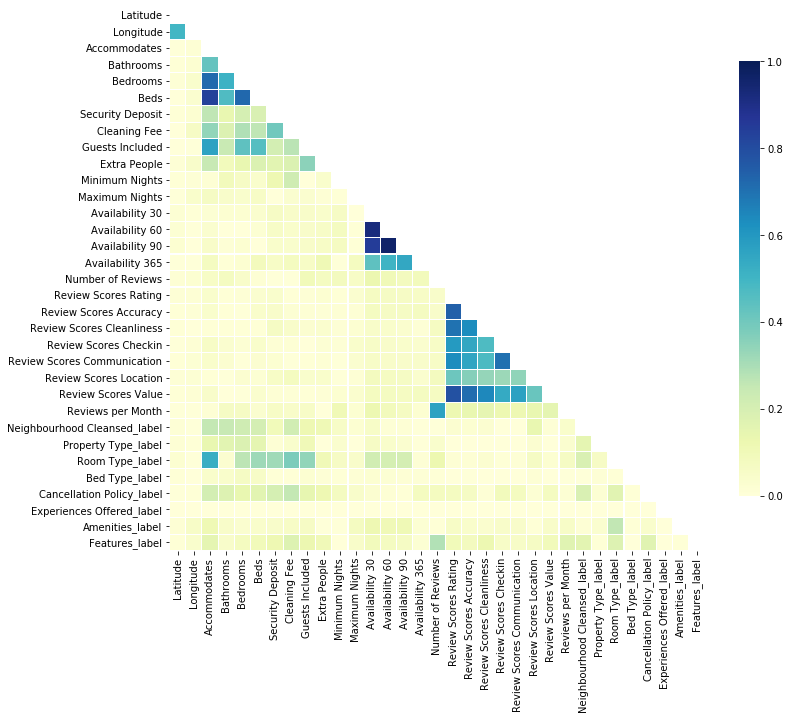

In [121]:
plot_corr_matrix(data, 'Price')

Vemos que hay tre partes altamente relacionadas:
 - Bathroms,Bedrooms,Accommodates y Beds
 - Availability 30, Availability 60, Availability 90 y Availability 365
 - Number of Reviews, Review Scores Rating, Review Scores Accuracy, Review Scores Cleanliness, Review Scores Communication, Review Scores Checkin, Review Scores Location, Review Scores Value
 
Creare unas variables nueva a modo de combinacion de estas anteriores,

In [122]:
def impute_new_values(df): 
    df['Reviews'] = (df['Review Scores Rating'] + df['Review Scores Accuracy'] + df['Review Scores Cleanliness'] + df['Review Scores Communication'] + df['Review Scores Checkin'] + df['Review Scores Location']) / (df['Review Scores Value'] / df['Number of Reviews'])
    df['Availability'] = (df['Availability 30'] + df['Availability 60'] + df['Availability 90']) / df['Availability 365'] 
    df['Availability'].fillna(0, inplace=True)
    df.drop(['Availability 30','Availability 60','Availability 90','Availability 365','Number of Reviews','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness', 'Review Scores Communication','Review Scores Checkin','Review Scores Location','Review Scores Value'], axis=1, inplace=True)


In [123]:
impute_new_values(data)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11778 entries, 0 to 11823
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Latitude                      11778 non-null  float64
 1   Longitude                     11778 non-null  float64
 2   Accommodates                  11778 non-null  int64  
 3   Bathrooms                     11778 non-null  float64
 4   Bedrooms                      11778 non-null  float64
 5   Beds                          11778 non-null  float64
 6   Price                         11778 non-null  float64
 7   Security Deposit              11778 non-null  float64
 8   Cleaning Fee                  11778 non-null  float64
 9   Guests Included               11778 non-null  int64  
 10  Extra People                  11778 non-null  int64  
 11  Minimum Nights                11778 non-null  int64  
 12  Maximum Nights                11778 non-null  int64  
 13  R

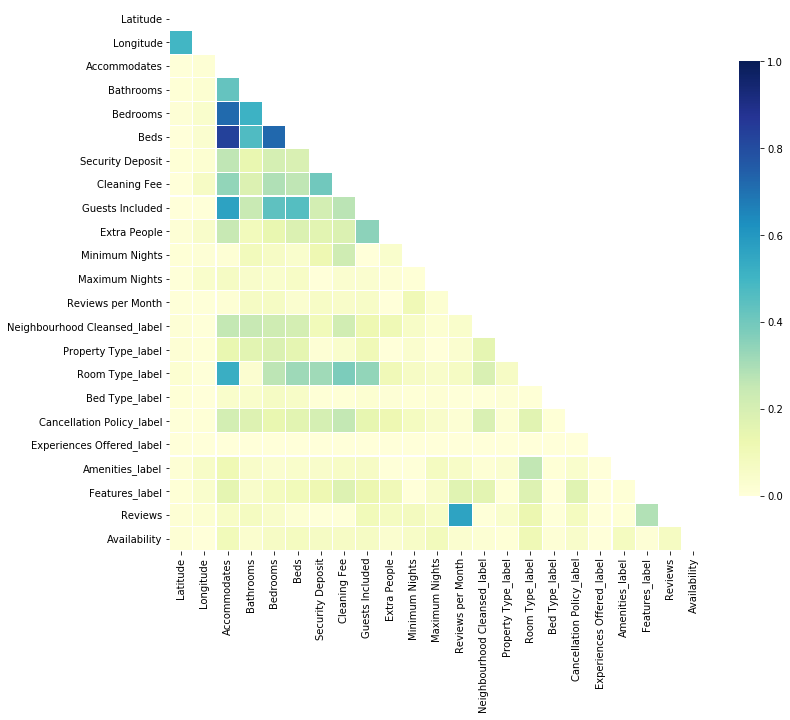

In [125]:
plot_corr_matrix(data, 'Price')

## Aqui empezaremos a probar nuestro modelo

In [126]:
def plot_predictions(data, test, predictions):
    plt.plot(range(0,len(data)),data, label='train')
    plt.plot(range(0,len(test)),test, label='test')
    plt.plot(range(0,len(predictions)),predictions, label='predictions')
    plt.legend()
    plt.show()

In [128]:
test = pd.read_csv('./test.csv', sep=';', decimal='.')
apply_codifications(test, encoder_dict)
apply_tansformtions(test, drop_cols, values_to_impute)
apply_dict_codification(test, amenities_dict, 'Amenities')
apply_dict_codification(test, feature_dict, 'Features')
impute_new_values(test)

test.fillna(0, inplace=True)

test_prepared = test.drop(['Price'], axis=1)
test_prices = test['Price'].copy()



In [129]:
test_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Latitude                      2956 non-null   float64
 1   Longitude                     2956 non-null   float64
 2   Accommodates                  2956 non-null   int64  
 3   Bathrooms                     2956 non-null   float64
 4   Bedrooms                      2956 non-null   float64
 5   Beds                          2956 non-null   float64
 6   Security Deposit              2956 non-null   float64
 7   Cleaning Fee                  2956 non-null   float64
 8   Guests Included               2956 non-null   int64  
 9   Extra People                  2956 non-null   int64  
 10  Minimum Nights                2956 non-null   int64  
 11  Maximum Nights                2956 non-null   int64  
 12  Reviews per Month             2956 non-null   float64
 13  Nei

In [130]:
data_prepared = data.drop(['Price'], axis=1)
labels = data['Price'].copy()
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11778 entries, 0 to 11823
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Latitude                      11778 non-null  float64
 1   Longitude                     11778 non-null  float64
 2   Accommodates                  11778 non-null  int64  
 3   Bathrooms                     11778 non-null  float64
 4   Bedrooms                      11778 non-null  float64
 5   Beds                          11778 non-null  float64
 6   Security Deposit              11778 non-null  float64
 7   Cleaning Fee                  11778 non-null  float64
 8   Guests Included               11778 non-null  int64  
 9   Extra People                  11778 non-null  int64  
 10  Minimum Nights                11778 non-null  int64  
 11  Maximum Nights                11778 non-null  int64  
 12  Reviews per Month             11778 non-null  float64
 13  N

In [209]:
from sklearn.preprocessing import Normalizer
from sklearn import metrics

def apply_and_plot_estimator(estimator, train=data_prepared, test=test_prepared, train_labels=labels, test_labels=test_prices, normalize=False):
    if(normalize):
        normalizer = Normalizer().fit(train)
        train = normalizer.transform(train)
        test = normalizer.transform(test)

    regressor = estimator
    regressor.fit(train, train_labels)

    t_predictions = regressor.predict(train)
    predictions = regressor.predict(test)

    t_mse = mean_squared_error(train_labels, t_predictions)
    t_rmse = mean_squared_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    rmse = np.sqrt(mse)

    print(f"Error medio: train -> {t_rmse} test -> {rmse}")
    
    plot_predictions(train_labels, test_labels, predictions)
    
    return regressor, predictions, rmse

In [210]:
def show_coefficients(data,coefs):
    for col,coef in zip(data,coefs):
        print(f"{col}: {coef}")

Vamos a probar una regresion lineal, primero sin normalizar y luego normalizado los datos
Sin normalizacion
Error medio: train -> 3046.9676019981566 test -> 55.19934421710241


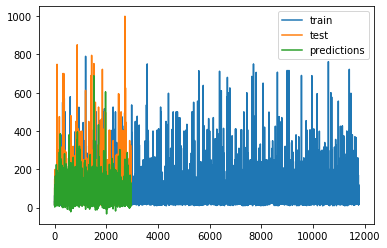

Con normalizacion
Error medio: train -> 4088.2380396191697 test -> 63.939330928773174


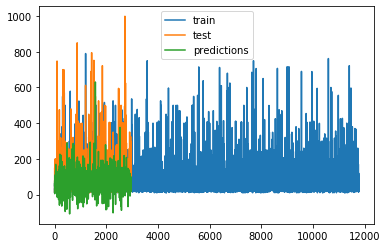

Observamos que se obtieen un mejor resultado sin normalizar 55.22611244843192 frente a 63.939330928773174.


In [211]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

print('Vamos a probar una regresion lineal, primero sin normalizar y luego normalizado los datos')

print('Sin normalizacion')
lin_reg,lr_pred, lr_nn_rmse = apply_and_plot_estimator(LinearRegression())
print('Con normalizacion')
lin_reg_e,lr_n_pred,lr_n_rmse = apply_and_plot_estimator(LinearRegression(), normalize=True)

print(f"Observamos que se obtieen un mejor resultado sin normalizar {nn_rmse} frente a {n_rmse}.")

In [212]:
# Grid Search resusable
from sklearn.model_selection import GridSearchCV

def grid_executor(algorithm, param_grid, X_train, y_train, scoring=None,cv = 5):
    grid = GridSearchCV(algorithm, scoring=scoring, param_grid=param_grid, cv = cv)
    grid.fit(X_train, y_train)
    return grid

best mean cross-validation score: 0.497
best parameters: {'alpha': 1e-10}
Error medio: train -> 3075.362229236207 test -> 55.45594854689808


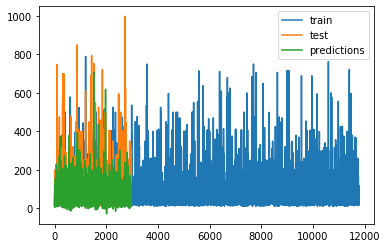

In [213]:
# LASSO
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-10,1,25)
param_grid = {'alpha': alpha_vector }
grid = grid_executor(Lasso(), param_grid, data_prepared, labels)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

lasso_reg,lasso_pred,lasso_rmse= apply_and_plot_estimator(grid.estimator)


Con Lasso vemos que se obtienen mejores resultados vamos a observar los coeficientes

In [214]:
show_coefficients(data_prepared, lasso_reg.coef_)

Latitude: -0.2097058637738364
Longitude: -0.055641307856860125
Accommodates: 7.242993116219463
Bathrooms: 6.526770595989913
Bedrooms: 10.402911827402487
Beds: -0.12674862549871294
Security Deposit: 0.00795175102279652
Cleaning Fee: 0.4269591836467524
Guests Included: -0.0
Extra People: -0.29571848915052346
Minimum Nights: -0.1807748065931895
Maximum Nights: 0.0011252088051118868
Reviews per Month: -0.35778974099805727
Neighbourhood Cleansed_label: 0.6222160091263879
Property Type_label: 0.060953479455169386
Room Type_label: 0.3499980468852291
Bed Type_label: 0.1995185818160949
Cancellation Policy_label: -0.1540859976962806
Experiences Offered_label: 0.0
Amenities_label: -2.556127279802716
Features_label: -0.0
Reviews: -0.007424702767822851
Availability: 0.0


Vemos que hay varios que el algorirmo los ha eliminado vamos a eliminarlos y a probar de nuevo la regresion lineal

Vamos a probar una regresion lineal, primero sin normalizar y luego normalizado los datos
Sin normalizacion
Error medio: train -> 3049.9234961668467 test -> 55.22611244843192


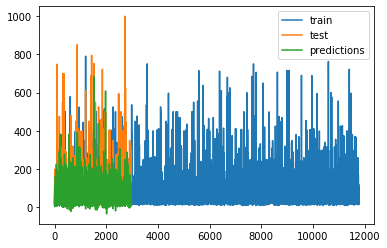

Con normalizacion
Error medio: train -> 4088.2380396191697 test -> 63.939330928773174


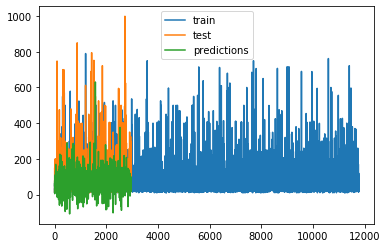

En este caso tras eliminar los coeficientes que Lasso ha descartado se obtienen mejores regultados al igual que en el original son mejores resultados para el no normalizado 55.22611244843192.


In [215]:
# LINEAR REGRESSION - LASSO COEFICIENTS
from sklearn.linear_model import LinearRegression

drop_cols  = [ w for w,i in zip(data_prepared, lasso_reg.coef_) if i == 0]
drop_cols.append('Price')

aux_prepared = data.drop(drop_cols, axis=1)
aux_test_prepared = test.drop(drop_cols, axis=1)

print('Vamos a probar una regresion lineal, primero sin normalizar y luego normalizado los datos')

print('Sin normalizacion')
lin_reg_ls,lr_ls_pred, lr_ls_nn_rmse = apply_and_plot_estimator(LinearRegression(), train= aux_prepared, test=aux_test_prepared)
print('Con normalizacion')
lin_reg_ls_e,lr_ls_e_pred,lr_ls_n_rmse = apply_and_plot_estimator(LinearRegression(), normalize=True)

print(f"En este caso tras eliminar los coeficientes que Lasso ha descartado se obtienen mejores regultados al igual que en el original son mejores resultados para el no normalizado {nn_rmse}.")

/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.06896e-20): result may not be accurate.
  overwrite_a=True).T
/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.00812e-20): result may not be accurate.
  overwrite_a=True).T
/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.0821e-20): result may not be accurate.
  overwrite_a=True).T
/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.96017e-20): result may not be accurate.
  overwrite_a=True).T
/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.94868e-20): result may not be accurate.
  overwrite_a=True).T
/home/alberto/an

best mean cross-validation score: 0.497
best parameters: {'alpha': 10.0}
Error medio: train -> 3046.987786710728 test -> 55.199527051513115


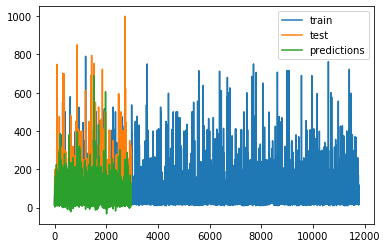

In [216]:
# RIDGE
from sklearn.linear_model import Ridge

alpha_vector = np.logspace(-10,1,25)
param_grid = {'alpha': alpha_vector }
grid = grid_executor(Ridge(), param_grid, data_prepared, labels)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

ridge_reg,rr_pred,rr_rmse = apply_and_plot_estimator(grid.estimator)


best mean cross-validation score: 0.511
best parameters: {'max_depth': 7}
Error medio: train -> 4365.339381809225 test -> 66.07071500906605


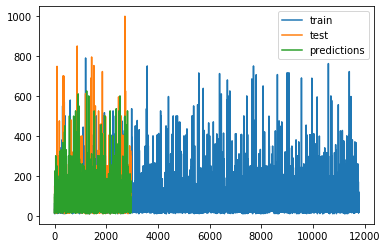

Error medio: train -> 4633.402464527289 test -> 68.06910065901627


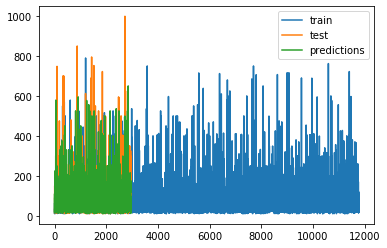

In [217]:
# DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor

maxDepth = list(range(1,21))
param_grid = {'max_depth': maxDepth}
grid = grid_executor(DecisionTreeRegressor(), param_grid, data_prepared, labels)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

tree_reg,tr_pred,tr_rmse = apply_and_plot_estimator(grid.estimator, normalize=True)

tree_reg_e,tr_e_pred,tr_e_rmse = apply_and_plot_estimator(grid.estimator, normalize=True)

best mean cross-validation score: 0.642
best parameters: {'max_depth': 13, 'n_estimators': 49}
Error medio: train -> 2026.31197926015 test -> 45.014575186934174


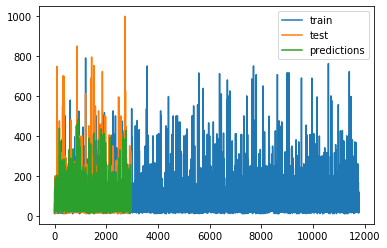

Error medio: train -> 2421.282097210033 test -> 49.206524945478854


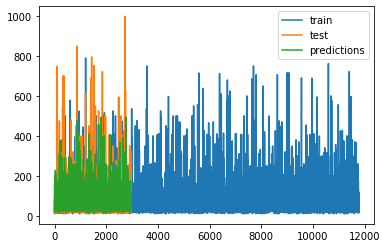

In [219]:
# RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

maxDepth = list(range(1,15))
nEstimators = list(range(1,50))
param_grid = {
                'max_depth': maxDepth,
                'n_estimators': nEstimators,
             }
grid = grid_executor(RandomForestRegressor(random_state=0), param_grid, data_prepared, labels)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

rnd_reg,rndr_pred,rndr_rmse = apply_and_plot_estimator(grid.estimator)

rnd_reg_e,rndr_e_pred,rndr_rmse = apply_and_plot_estimator(grid.estimator, normalize=True)

best mean cross-validation score: 0.677
best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
Error medio: train -> 2077.7280096953796 test -> 45.582101856928226


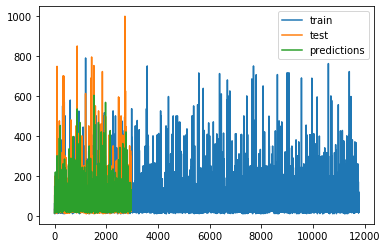

Error medio: train -> 2314.8753771130996 test -> 48.11315181021816


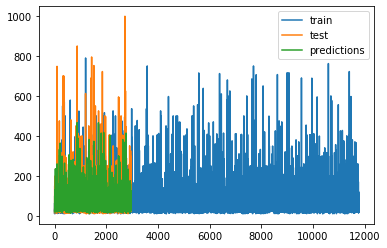

In [222]:
# GRADIEND BOOSTING REGRESSOR
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [150,200, 250]
learningRate = [0.1,0.05]
maxDepth = list(range(1,10))

param_grid = {
    'max_depth': maxDepth,
    'n_estimators': Niterations,
    'learning_rate':learningRate
}
grid = grid_executor(GradientBoostingRegressor(random_state=0, ), param_grid, data_prepared, labels)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

gb_reg,gb_pred,gb_rmse = apply_and_plot_estimator(grid.estimator)

gb_reg_e,gb_e_pred,gb_e_rmse = apply_and_plot_estimator(grid.estimator, normalize=True)


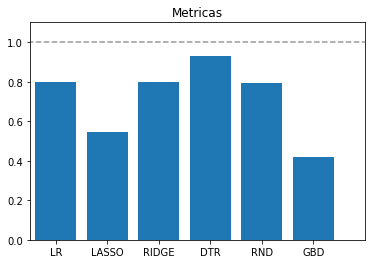

Podemos observar que el mejor modelo es DTR con un mse 68.06910065901627


In [227]:
errors = [lr_nn_rmse, lasso_rmse ,rr_rmse,tr_e_rmse,rndr_rmse,gb_rmse]
errors_normalized = list(map(lambda it: 1-it%1, errors))
errors_lbl = ['LR','LASSO','RIDGE','DTR','RND','GBD']
errors_len = len(errors)
plt.bar(range(errors_len),errors_normalized)
plt.xticks(range(errors_len), errors_lbl)
plt.plot([-1, errors_len], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.xlim((-0.5,errors_len))
plt.ylim((0,1.1))
plt.title('Metricas')
plt.show()

m_i = errors.index(max(errors))
print(f"Podemos observar que el mejor modelo es {errors_lbl[m_i]} con un mse {errors[m_i]}")

Si observamos de nuevo lagradica para el modelo Decision Tree Regressor, vemos que mas o menos se ajusta a lo que esperamos


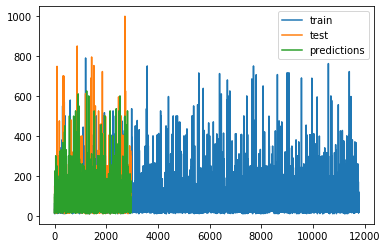

In [237]:
print(f"Si observamos de nuevo lagradica para el modelo Decision Tree Regressor, vemos que mas o menos se ajusta a lo que esperamos")
plot_predictions(labels, test_prices, tr_pred)

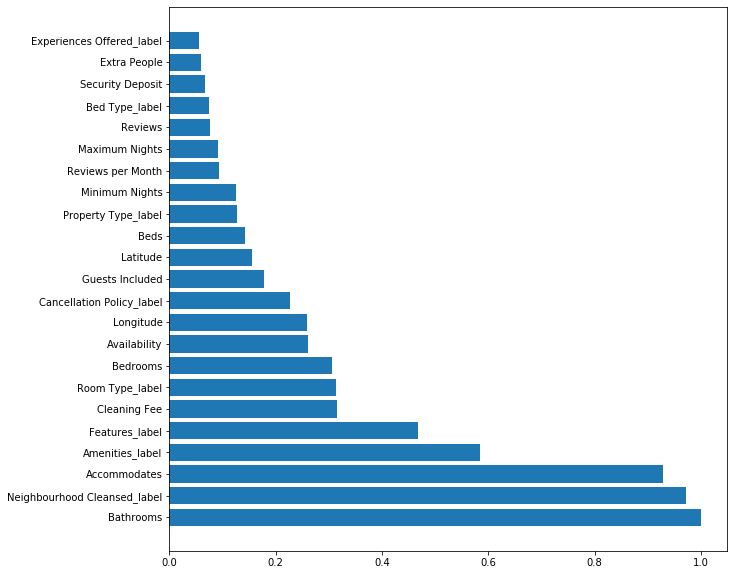

In [260]:
importances = tree_reg.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(data_prepared.shape[1]),importances[indices])
plt.yticks(range(data_prepared.shape[1]),data_prepared.columns[indices])
plt.show()

Aqui podemos ver que los atributos que mas afectan (a mi parecer todos lo que esten por encima de 0.4) son `Features_label`, `Amenities_label`, `Accommodates`,`Neighbourhood Cleansed_label` y  `Bathrooms`